In [38]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np

'''
Variables: 
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) 
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters 

'''



'\nVariables: \n---------\n\ncorpus : list of documents\nembeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) \nred_emd : reduced embeddings matrix using dimentionality reduction\nk : number of clusters\nlabels : documents labels\npred : list of clustering predicted clusters \n\n'

In [39]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

def dim_red(mat, p):
    '''
    Perform dimensionality reduction using t-SNE

    Input:
    -----
        mat : NxM list 
        p : number of dimensions to keep 
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''
    
    tsne = TSNE(n_components = p, random_state=42)
    red_mat = tsne.fit_transform(mat)
    
    return red_mat

In [40]:
def clust(mat, k):
    kmeans = KMeans(n_clusters=k)
    pred = kmeans.fit_predict(mat)
    return pred

In [46]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# perform dimentionality reduction
red_emb = dim_red(embeddings, 3)

# perform clustering
pred = clust(red_emb, k)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')


c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


NMI: 0.39 
ARI: 0.22


## *Visualisation*


***TSNE avec n_components = 2***

In [48]:

red_emb = dim_red(embeddings, 2)

# perform clustering
pred = clust(red_emb, k)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')


c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


NMI: 0.43 
ARI: 0.25


***Scatter Plot of Clusters:***

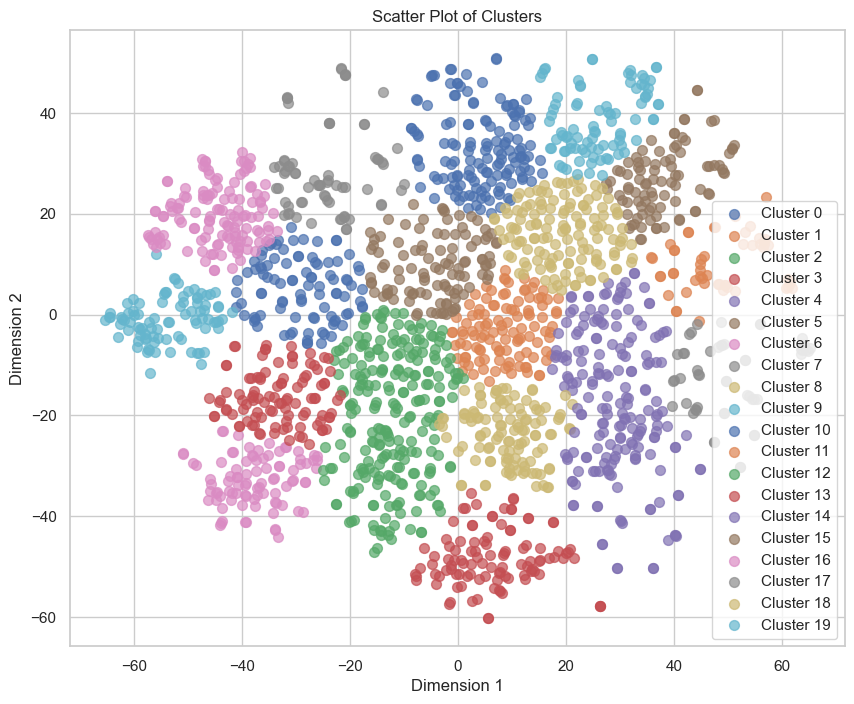

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style='whitegrid')

# Scatter plot for each cluster with different colors
plt.figure(figsize=(10, 8))
for i in range(k):
    plt.scatter(
        red_emb[pred == i, 0],
        red_emb[pred == i, 1],
        label=f'Cluster {i}',
        alpha=0.7,
        s=50,
    )

plt.title('Scatter Plot of Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


***Pair Plot:***

c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (5) than needed (20) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (5) than needed (20) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


<Figure size 1200x1000 with 0 Axes>

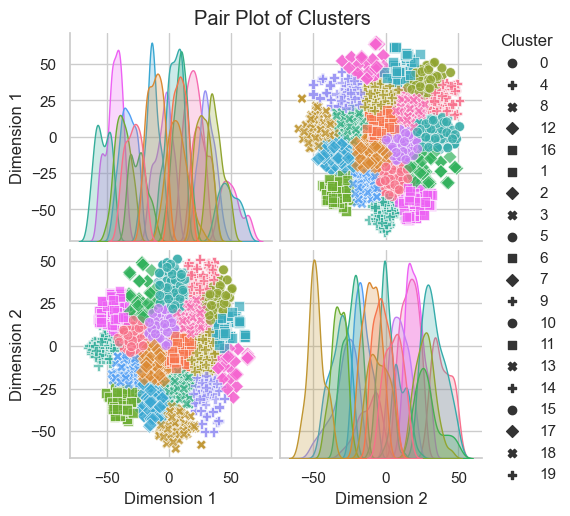

In [50]:
import seaborn as sns
import pandas as pd

# Combine data and cluster labels into a DataFrame
data_df = pd.DataFrame(red_emb, columns=['Dimension 1', 'Dimension 2'])
data_df['Cluster'] = pred

# Set Seaborn style
sns.set(style='whitegrid')

# Plot pair plot with enhanced aesthetics
plt.figure(figsize=(12, 10))
sns.pairplot(
    data_df,
    hue='Cluster',
    palette='husl',
    markers=["o", "s", "D", "X", "P"],
    diag_kind='kde',  # Kernel density estimation on the diagonal
    plot_kws={'alpha': 0.7, 's': 50},
)
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()


***Scatter plot of real labels***

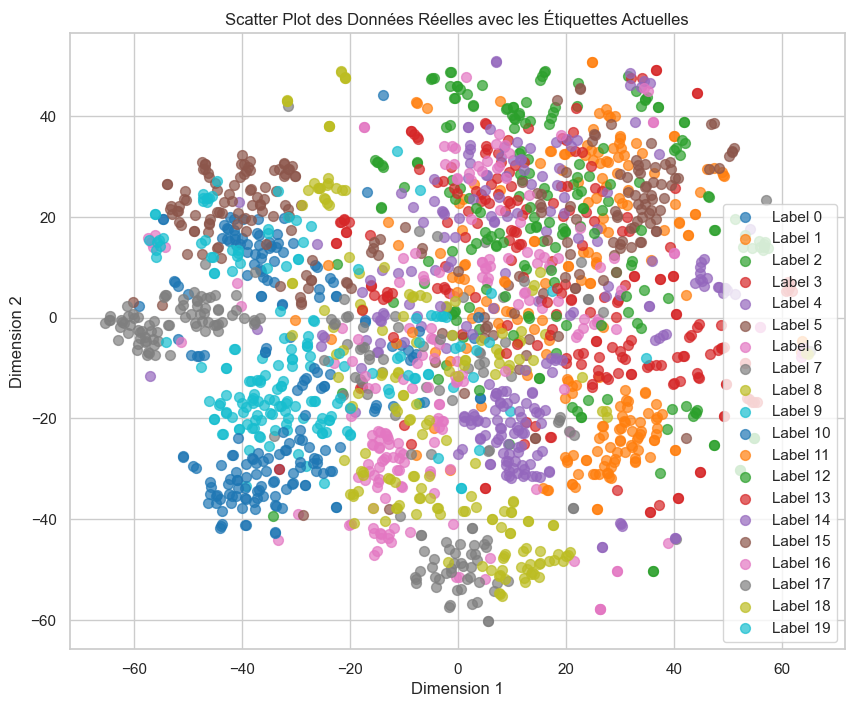

In [51]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Définir une palette de couleurs pour les étiquettes
colors = list(mcolors.TABLEAU_COLORS.values())

# Scatter plot pour chaque étiquette réelle avec des couleurs différentes
plt.figure(figsize=(10, 8))
for i in range(len(set(labels))):
    plt.scatter(
        red_emb[labels == i, 0],
        red_emb[labels == i, 1],
        label=f'Label {i}',
        alpha=0.7,
        s=50,
        color=colors[i % len(colors)]  # Utiliser des couleurs différentes pour chaque étiquette
    )

plt.title('Scatter Plot des Données Réelles avec les Étiquettes Actuelles')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


# Experimentation with Data Cleaning 

In [54]:
import re 

# Data Cleaning Pipeline
labels_names = ng20.target_names[:2000]

# Creating a dataframe from the loaded data
news_df = pd.DataFrame({'news': corpus, 
                        'class': labels})

In [55]:
def clean_text(text):
    
    # remove between square brackets
    text = re.sub('\[[^]]*\]', '', text)
    
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # remove @mention
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    
    # remove twitter tags
    text = text.replace("<@>", "")
    
    # remove hashtags
    text = text.replace("#", "")
    
    # remove unwanted punctuations
    text = re.sub('[%s]' % re.escape(""""#$%&'()*+-/,:;<=>[\]^_`{|}~•"""), ' ', text)
    
    # remove extra whitespace
    text = re.sub('\s+', ' ', text) 

    return text.lower()

news_df["cleaned_text"] = news_df["news"].apply(lambda x: clean_text(x))

c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems(

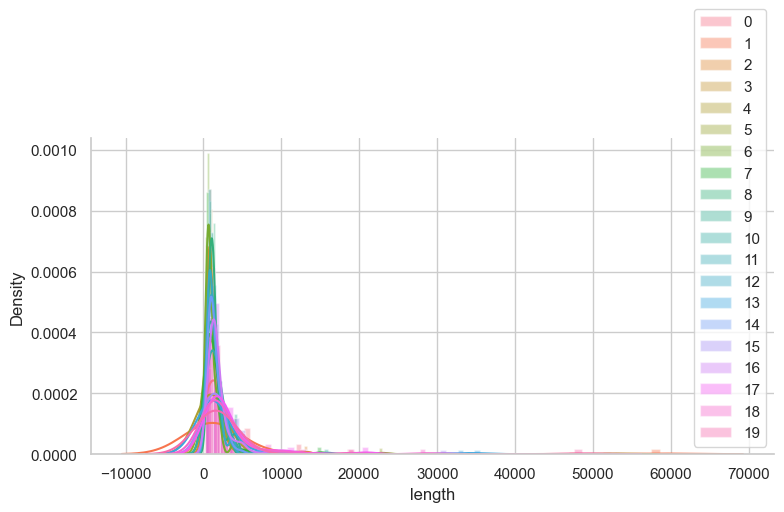

In [56]:
# making length a feature for visualizations
news_df['length']= news_df['news'].apply(len)
g=sns.FacetGrid(news_df,hue='class',height=4,aspect=2)
g=g.map(sns.distplot,'length')
plt.legend()

In [57]:
texts = news_df["cleaned_text"]

In [58]:
# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(texts)

# perform dimentionality reduction
red_emb = dim_red(embeddings, 20)

# perform clustering
pred = clust(red_emb, k)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

In [ ]:
# perform dimentionality reduction
red_emb = dim_red(embeddings, 2)

# perform clustering
pred = clust(red_emb, k)

# Combine data and cluster labels into a DataFrame
data_df = pd.DataFrame(red_emb, columns=['Dimension 1', 'Dimension 2'])
data_df['Cluster'] = pred

# Set Seaborn style
sns.set(style='whitegrid')

# Plot pair plot with enhanced aesthetics
plt.figure(figsize=(12, 10))
sns.pairplot(
    data_df,
    hue='Cluster',
    palette='husl',
    markers=["o", "s", "D", "X", "P"],
    diag_kind='kde',  # Kernel density estimation on the diagonal
    plot_kws={'alpha': 0.7, 's': 50},
)
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()